In [8]:
import os
import sys
import random
import numpy as np
import pandas as pd
import time
import copy
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from model_methods import train_one_epoch, evaluate, run_training
from data_loader import (
    BATCH_SIZE, EPOCHS, LR, IMG_SIZE, mean, std,
    train_ds, val_ds, test_ds, train_loader, val_loader, test_loader, class_names
)

# ── Seeds ────────────────────────────────────────────────────────
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


In [9]:
# ── Hyperparameters ──────────────────────────────────────────────
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# BATCH_SIZE = 64
# EPOCHS = 50
# LR = 0.001
# IMG_SIZE = 224
# mean = np.array([0.485, 0.456, 0.406])
# std = np.array([0.229, 0.224, 0.225])

In [10]:
# ── Unnormalize for visualization ────────────────────────────────
def unnormalize(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = std * img + mean
    return np.clip(img, 0, 1)

In [11]:
EPOCHS = 50
# ── Modelo ───────────────────────────────────────────────────────
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, len(class_names))
)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# run_training(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=EPOCHS, device=DEVICE)


In [13]:
# ── Cargar modelo ya entrenado ───────────────────────────────────
model = models.resnet18(weights=None)  # No cargar pesos preentrenados de ImageNet
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, len(class_names))
)
model.load_state_dict(torch.load("../pesos/resnet18_best.pth", map_location=DEVICE))
model = model.to(DEVICE)
model.eval()

# ── Evaluar en el conjunto de test ───────────────────────────────
# test_loss, test_acc, y_true, y_pred = evaluate(model, test_loader, criterion, DEVICE)

# print(f"\n🎯 Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

# # ── Reporte de clasificación y matriz de confusión ───────────────

# present_labels = sorted(list(unique_labels(y_true, y_pred)))
# present_class_names = [class_names[i] for i in present_labels]

# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=present_class_names))

# cm = confusion_matrix(y_true, y_pred, labels=present_labels)


# selected_indices = sorted(random.sample(present_labels, min(40, len(present_labels))))
# selected_names = [class_names[i] for i in selected_indices]
# cm_20 = cm[np.ix_([present_labels.index(i) for i in selected_indices],
#                   [present_labels.index(i) for i in selected_indices])]

# fig, ax = plt.subplots(figsize=(10, 10))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_20, display_labels=selected_names)
# disp.plot(ax=ax, xticks_rotation=90, cmap='Blues', colorbar=True)
# plt.title("Test Confusion Matrix")
# plt.tight_layout()
# plt.show()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
import os
EPOCHS = 20 

# ── Modelo ───────────────────────────────────────────────────────
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

# Replace classifier (fully connected part)
model.classifier[6] = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.classifier[6].in_features, len(class_names))
)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# ── Entrenamiento ────────────────────────────────────────────────

#run_training(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=EPOCHS, save_path="alexnet_best.pth", device=DEVICE)


In [ ]:

EPOCHS = 17

# ── Modelo ───────────────────────────────────────────────────────
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Replace the final fully connected layer
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, len(class_names))
)
model = model.to(DEVICE)

# ── Optimizador, Criterio y Scheduler ─────────────────────────────
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# ── Entrenamiento ────────────────────────────────────────────────
# run_training(
#     model,
#     train_loader,
#     val_loader,
#     criterion,
#     optimizer,
#     scheduler,
#     epochs=EPOCHS,
#     save_path="resnet50_best.pth",
#     device=DEVICE
# )


Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]/home/manuramirezsilva/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



🎯 Test Loss: 0.8188 | Test Accuracy: 80.17%

Classification Report:
               precision    recall  f1-score   support

           AM       0.71      0.56      0.62        18
        Acura       0.81      0.58      0.68        90
        Aston       0.90      0.76      0.83        59
         Audi       0.88      0.89      0.88       245
          BMW       0.82      0.92      0.87       197
      Bentley       0.94      0.86      0.90        92
      Bugatti       0.89      0.94      0.91        33
        Buick       0.87      0.76      0.81        62
     Cadillac       0.91      0.76      0.83        54
    Chevrolet       0.77      0.86      0.81       340
     Chrysler       0.77      0.77      0.77       110
       Daewoo       0.88      0.62      0.73        24
        Dodge       0.81      0.86      0.83       269
        Eagle       0.74      0.56      0.64        25
         FIAT       0.82      0.97      0.89        32
      Ferrari       0.91      0.88      0.90      

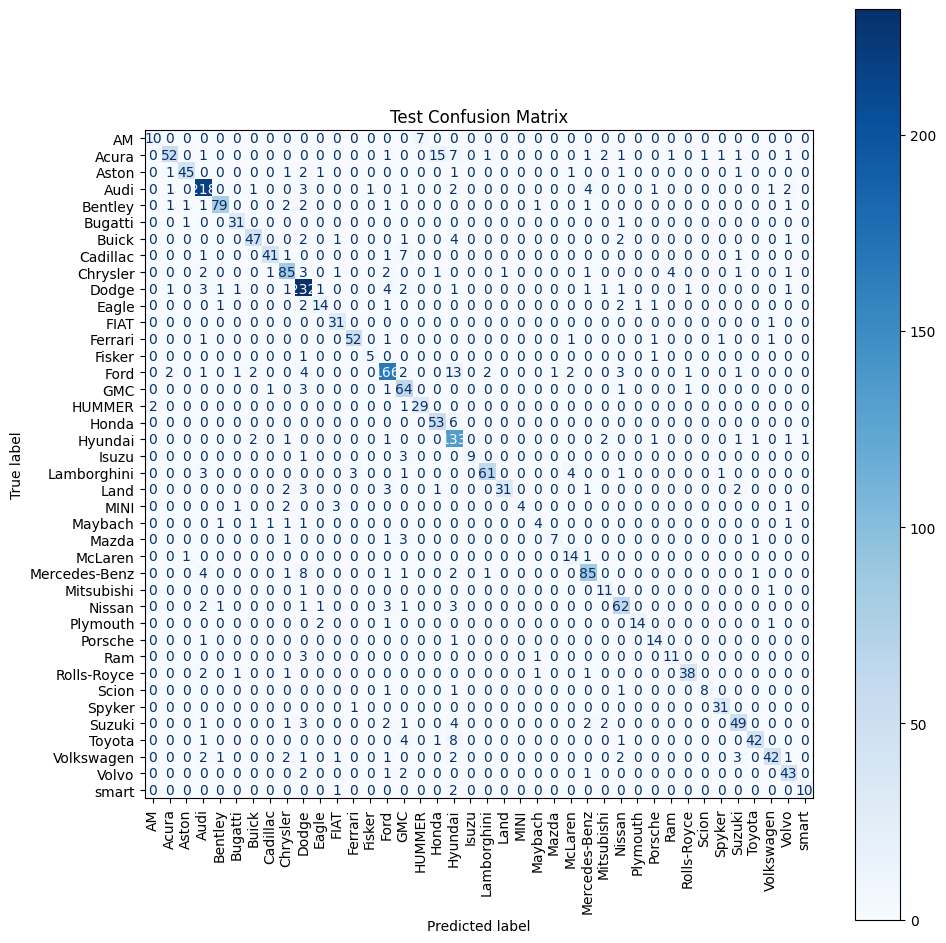

In [ ]:
# ── Cargar modelo ya entrenado ───────────────────────────────────
model = models.resnet50(weights=None)  # No cargar pesos preentrenados de ImageNet
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, len(class_names))
)
model.load_state_dict(torch.load("resnet50_best copy.pth", map_location=DEVICE))
model = model.to(DEVICE)
model.eval()

# ── Evaluar en el conjunto de test ───────────────────────────────
test_loss, test_acc, y_true, y_pred = evaluate(model, test_loader, criterion, DEVICE)

print(f"\n🎯 Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

# ── Reporte de clasificación y matriz de confusión ───────────────

present_labels = sorted(list(unique_labels(y_true, y_pred)))
present_class_names = [class_names[i] for i in present_labels]

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=present_class_names))

cm = confusion_matrix(y_true, y_pred, labels=present_labels)


selected_indices = sorted(random.sample(present_labels, min(40, len(present_labels))))
selected_names = [class_names[i] for i in selected_indices]
cm_20 = cm[np.ix_([present_labels.index(i) for i in selected_indices],
                  [present_labels.index(i) for i in selected_indices])]

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_20, display_labels=selected_names)
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues', colorbar=True)
plt.title("Test Confusion Matrix")
plt.tight_layout()
plt.show()
